In [1]:
import pandas as pd
import numpy as np
import DataPreprocessingLibrary as dpl
import string
# https://pypi.org/project/COVID19Py/

pd.set_option('display.max_colwidth', -1)


API_COLUMNS = ["Title", "Description", "NewsURL", "PublishedTime", "SourceName" , "SourceURL"]
# api_content = pd.read_csv("../Data/NewsContentClean.csv")
api_content = pd.read_csv("../Data/NewsContent.csv", index_col=[0])

In [2]:
from textblob import TextBlob
import nltk
from textblob import Word
from textblob.wordnet import VERB

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
temp1 = api_content.iloc[-2].Title
print("Showing the results of the original : \n" + str(temp1) + "\n================================================\n")
print("Showing the results of the preprocessed : \n" + str(dpl.preprocess(temp1) + "\n================================================\n"))

Showing the results of the original : 
michelle obama says she is dealing with  low grade depression  amid virus pandemic  racial injustice in us

Showing the results of the preprocessed : 
michelle obama says she is dealing with  low grade depression  amid virus pandemic  racial injustice in us



In [5]:
api_content["Title"] = api_content['Title'].apply(dpl.preprocess)
api_content["Description"] = api_content['Description'].apply(dpl.preprocess)

# api_content = api_content.drop(["Title","Description"] , axis = 1) 
# api_content.to_csv("../Data/NewsContentPreprocessed.csv", index= False)

In [6]:
sentiment_value = []
sentiment_value_description = []

sentiment_value_nltk = []
sentiment_value_description_nltk = []

for title in api_content.Title.values:
    sentiment_value.append(  TextBlob( title ).sentiment.polarity  )
    sentiment_value_nltk.append(analyzer.polarity_scores(title)["compound"])
    
for description in api_content.Description.values:
    sentiment_value_description.append(  TextBlob( description ).sentiment.polarity  )
    sentiment_value_description_nltk.append(analyzer.polarity_scores(description)["compound"])
    

In [7]:
api_content["SentimentValueTitle"] = sentiment_value
api_content["SentimentValueDescription"] = sentiment_value_description

api_content["SentimentValueTitleVader"] = sentiment_value_nltk
api_content["SentimentValueDescriptionVader"] = sentiment_value_description_nltk



In [8]:
### General Sentiment value for the title is 0.03, pretty average but still more positive
### General Sentiment value for the description is 0.07, pretty average but still more positive

In [9]:
api_content['SentimentValueTitle'].describe()

count    1599.000000
mean     0.035526   
std      0.211117   
min     -1.000000   
25%      0.000000   
50%      0.000000   
75%      0.125000   
max      1.000000   
Name: SentimentValueTitle, dtype: float64

In [10]:
api_content['SentimentValueDescription'].describe()

count    1599.000000
mean     0.077028   
std      0.199815   
min     -1.000000   
25%      0.000000   
50%      0.042045   
75%      0.183144   
max      1.000000   
Name: SentimentValueDescription, dtype: float64

In [11]:
api_content['SentimentValueTitleVader'].describe()

count    1599.000000
mean    -0.104415   
std      0.370811   
min     -0.911800   
25%     -0.399550   
50%      0.000000   
75%      0.000000   
max      0.812600   
Name: SentimentValueTitleVader, dtype: float64

In [12]:
api_content['SentimentValueDescriptionVader'].describe()


count    1599.000000
mean    -0.002024   
std      0.458000   
min     -0.957800   
25%     -0.381800   
50%      0.000000   
75%      0.381800   
max      0.967400   
Name: SentimentValueDescriptionVader, dtype: float64

In [13]:
sentiment_values_df = api_content.copy()
sentiment_values_df_grouped = sentiment_values_df.groupby("PublishedTime").mean()

In [14]:
api_content.to_csv("../Data/NewsContentPreprocessed.csv")
sentiment_values_df_grouped.to_csv("../Data/SentimentValues.csv")

In [15]:
pd.set_option('display.max_colwidth', 30)

api_content

,Title,Description,NewsURL,PublishedTime,SourceName,SourceURL,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
0,white house doesn rule out...,the white house is not rul...,https://abcnews.go.com/Pol...,2020-01-29,ABC,https://abcnews.go.com,0.000000,0.258333,-0.4215,0.0000
1,virus crisis in china to h...,china controls almost ...,https://dfw.cbslocal.com/2...,2020-01-29,CBS Boston / WBZ,https://dfw.cbslocal.com,0.100000,0.300000,-0.6249,0.4215
2,virus cases in us should n...,a deadly virus that killed...,https://www.foxnews.com/he...,2020-01-29,Fox News,https://www.foxnews.com,0.500000,-0.040000,-0.3972,-0.8225
3,us learned from ebola but ...,the department of homelan...,https://www.usatoday.com/s...,2020-01-29,USA Today,https://www.usatoday.com,0.100000,0.000000,-0.2498,0.5859
4,virus japan and us fly ci...,japan and us airlift hundr...,https://www.theguardian.co...,2020-01-29,The Guardian,https://www.theguardian.com,0.800000,0.400000,-0.5994,-0.5994
...,...,...,...,...,...,...,...,...,...,...
1597,virus updates us records ...,a pandemic of the novel vi...,https://www.msn.com/en-us/...,2020-08-06,ABC News on MSN.com,https://www.msn.com,0.032468,0.145455,0.0000,-0.4939
1594,us virus country can get ...,the united states has what...,https://www.msn.com/en-us/...,2020-08-06,CNN on MSN.com,https://www.msn.com,-0.155556,0.073148,0.0000,0.2263
1595,amid virus more than thir...,one out of three s adults...,https://www.foxnews.com/he...,2020-08-06,Fox News,https://www.foxnews.com,0.250000,0.000000,0.0000,-0.2960
1596,michelle obama says she is...,i be remiss to say that pa...,https://www.bostonglobe.co...,2020-08-06,The Boston Globe,https://www.bostonglobe.com,0.000000,0.000000,-0.8591,-0.7411


In [16]:
sentiment_values_df_grouped

,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
PublishedTime,,,,
2020-01-29,0.255208,0.153056,-0.438800,-0.069083
2020-01-30,0.022386,0.040869,0.058820,-0.249390
2020-01-31,-0.093182,0.007828,-0.218489,-0.199178
2020-02-01,0.067340,0.135278,-0.117200,0.247789
2020-02-02,0.000000,0.129167,-0.363450,-0.707050
...,...,...,...,...
2020-08-02,0.085606,0.106282,-0.083450,-0.084410
2020-08-03,-0.001919,0.106439,-0.064120,0.231020
2020-08-04,0.049923,0.152813,0.070144,0.169833


In [17]:
# temp  = pd.read_csv("../Data/SentimentValues.csv", index_col=[0])
# temp  = pd.read_csv("../Data/NewsContentPreprocessed.csv", index_col=[0])
# # temp

In [18]:
showcase = pd.read_csv("../Data/NewsContent.csv", index_col=[0])
showcase["CleanTitle"] = showcase['Title'].apply(dpl.preprocess) 
showcase["CleanDescription"] = showcase['Description'].apply(dpl.preprocess) 
showcase = showcase.drop(["NewsURL" , "SourceName", "SourceURL"], axis = 1)
showcase

,Title,Description,PublishedTime,CleanTitle,CleanDescription
0,White House doesn't rule o...,The White House is not rul...,2020-01-29,white house doesn rule out...,the white house is not rul...
1,Coronavirus Crisis In Chin...,“China controls almost 100...,2020-01-29,virus crisis in china to h...,china controls almost ...
2,Coronavirus cases in US sh...,A deadly coronavirus that'...,2020-01-29,virus cases in us should n...,a deadly virus that killed...
3,US learned from Ebola but ...,“The Department of Homelan...,2020-01-29,us learned from ebola but ...,the department of homelan...
4,Coronavirus: Japan and US ...,Japan and US airlift hundr...,2020-01-29,virus japan and us fly ci...,japan and us airlift hundr...
...,...,...,...,...,...
1597,Coronavirus updates: US re...,A pandemic of the novel co...,2020-08-06,virus updates us records ...,a pandemic of the novel vi...
1594,US coronavirus: Country ca...,The United States has what...,2020-08-06,us virus country can get ...,the united states has what...
1595,"Amid coronavirus, more tha...",One out of three U.S. adul...,2020-08-06,amid virus more than thir...,one out of three s adults...
1596,Michelle Obama says she is...,I’d be remiss to say that ...,2020-08-06,michelle obama says she is...,i be remiss to say that pa...


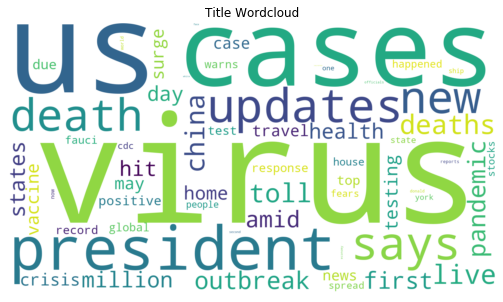

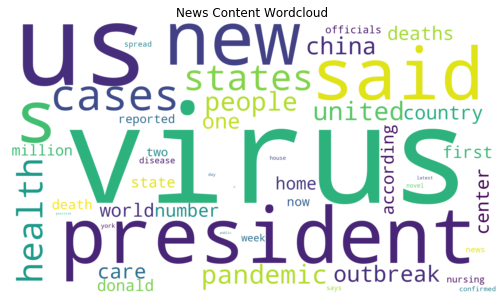

In [19]:

dpl.make_word_cloud(showcase , "CleanTitle", "Title Wordcloud")
dpl.make_word_cloud(showcase, "CleanDescription", "News Content Wordcloud")